# Libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt, cm 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

# Wrangling Model

In [2]:
df = pd.read_csv('Cancer - Cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape

(569, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Data Preprocessing

In [5]:
df.drop('id',axis = 1, inplace = True)a

In [6]:
df.shape

(569, 31)

In [7]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [73]:
df.describe(include = np.number).T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,2.619131,0.238189,1.943192,2.459589,2.593013,2.758743,3.336125
texture_mean,569.0,2.935269,0.220789,2.273156,2.783158,2.935982,3.081910,3.670715
perimeter_mean,569.0,4.489174,0.251084,3.779405,4.319752,4.457134,4.645352,5.239098
area_mean,569.0,6.363185,0.483139,4.966335,6.040969,6.311916,6.662749,7.824446
smoothness_mean,569.0,-2.350210,0.145572,-2.944469,-2.449115,-2.344762,-2.250942,-1.811554
compactness_mean,569.0,-2.380518,0.494459,-3.943514,-2.734600,-2.379142,-2.037149,-1.063052
concavity_mean,569.0,-inf,NaN,-inf,-3.521333,-2.788068,-2.034851,-0.851440
concave points_mean,569.0,-inf,NaN,-inf,-3.896642,-3.396210,-2.603690,-1.603456
symmetry_mean,569.0,-1.719430,0.148229,-2.244316,-1.820776,-1.719253,-1.631172,-1.190728
fractal_dimension_mean,569.0,-2.773718,0.106867,-2.996533,-2.852498,-2.788068,-2.716284,-2.328518


## Scaling data 

In [10]:
for c in df.columns[1:]:
    df[c] = np.log(df[c])

## Show Statistical Information

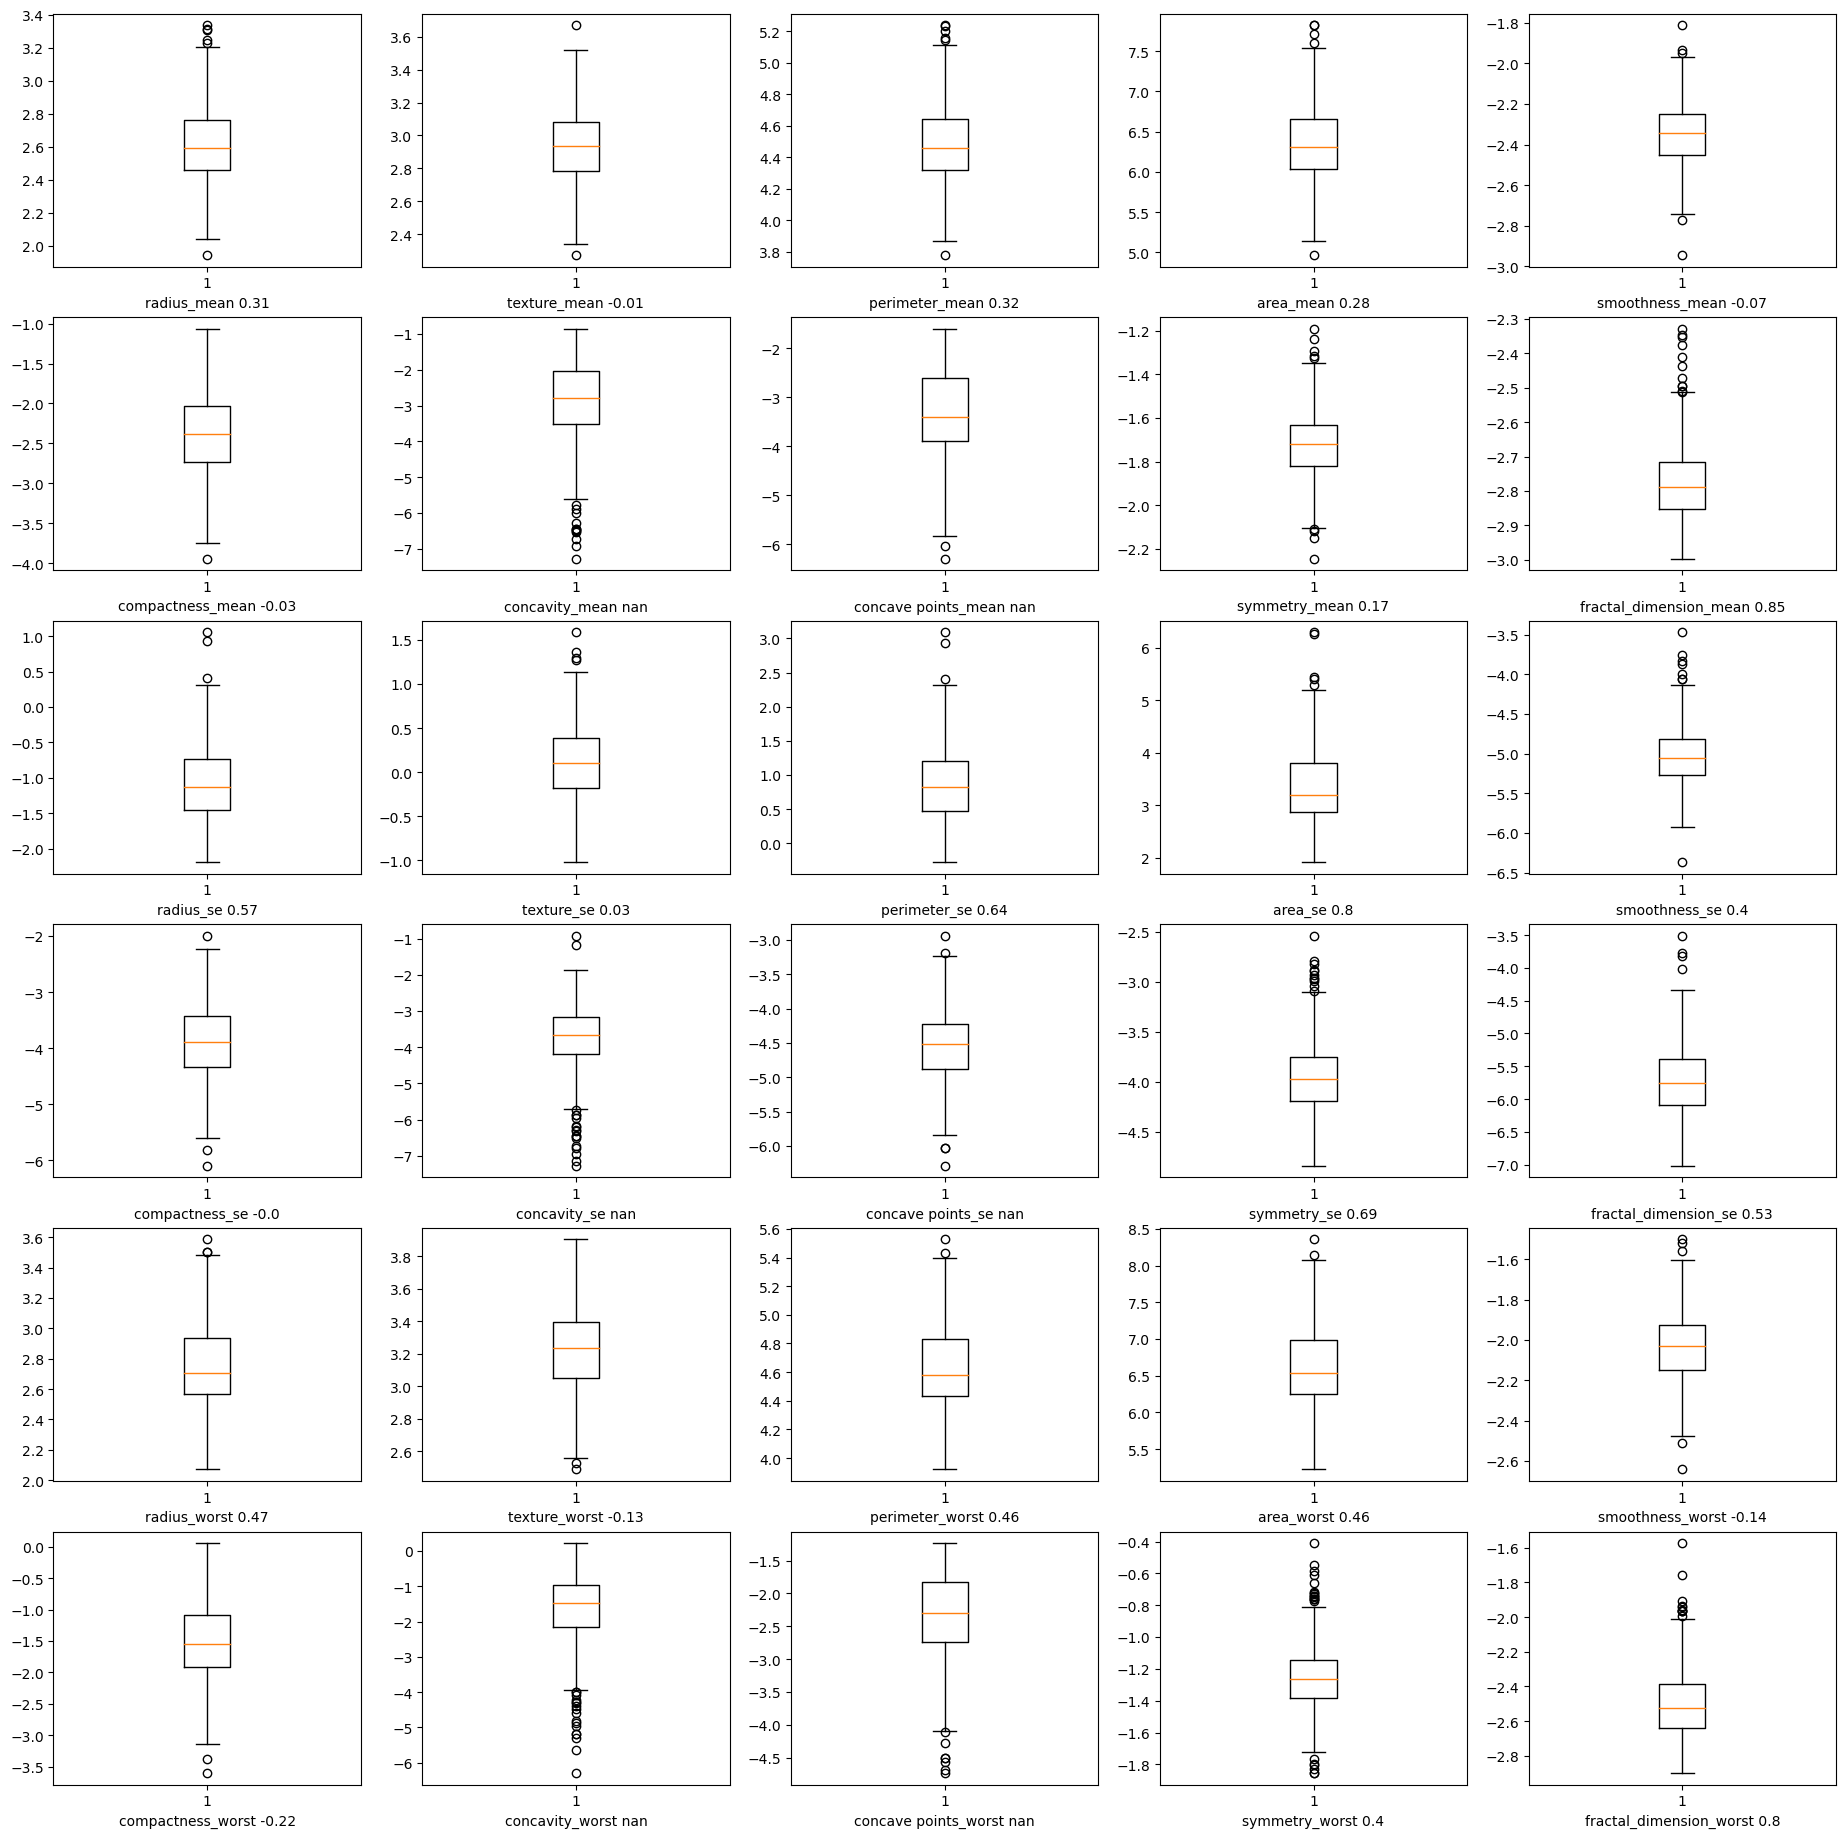

In [11]:
fig, axes = plt.subplots(6, 5, figsize=(23, 23))
num_cols = 1
for x in range(len(axes)):
    for y in range(len(axes[0])):
        axes[x, y].boxplot(df[df.columns[num_cols]])
        axes[x, y].set_xlabel(f'{df.columns[num_cols]} {round(df[df.columns[num_cols]].skew(), 2)}') 
        num_cols += 1

## Removing Outliers

In [12]:
media = df.mean()
desvio_padrao = df.std()
limite_superior = media + 3 * desvio_padrao
limite_inferior = media - 3 * desvio_padrao
outliers = df[(df > limite_superior) | (df < limite_inferior)].stack()

In [13]:
df_clean= df.drop(outliers.index.get_level_values(0))

In [14]:
def remove_outliers(col):
    global df_clean
    Q1 = df_clean[col].quantile(.25)
    Q3 = df_clean[col].quantile(.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] > low) & (df_clean[col] < high)]
    return df_clean

In [15]:
df_clean.shape

(542, 31)

In [16]:
for col in df_clean.columns[1:]:
    df_clean = remove_outliers(col)

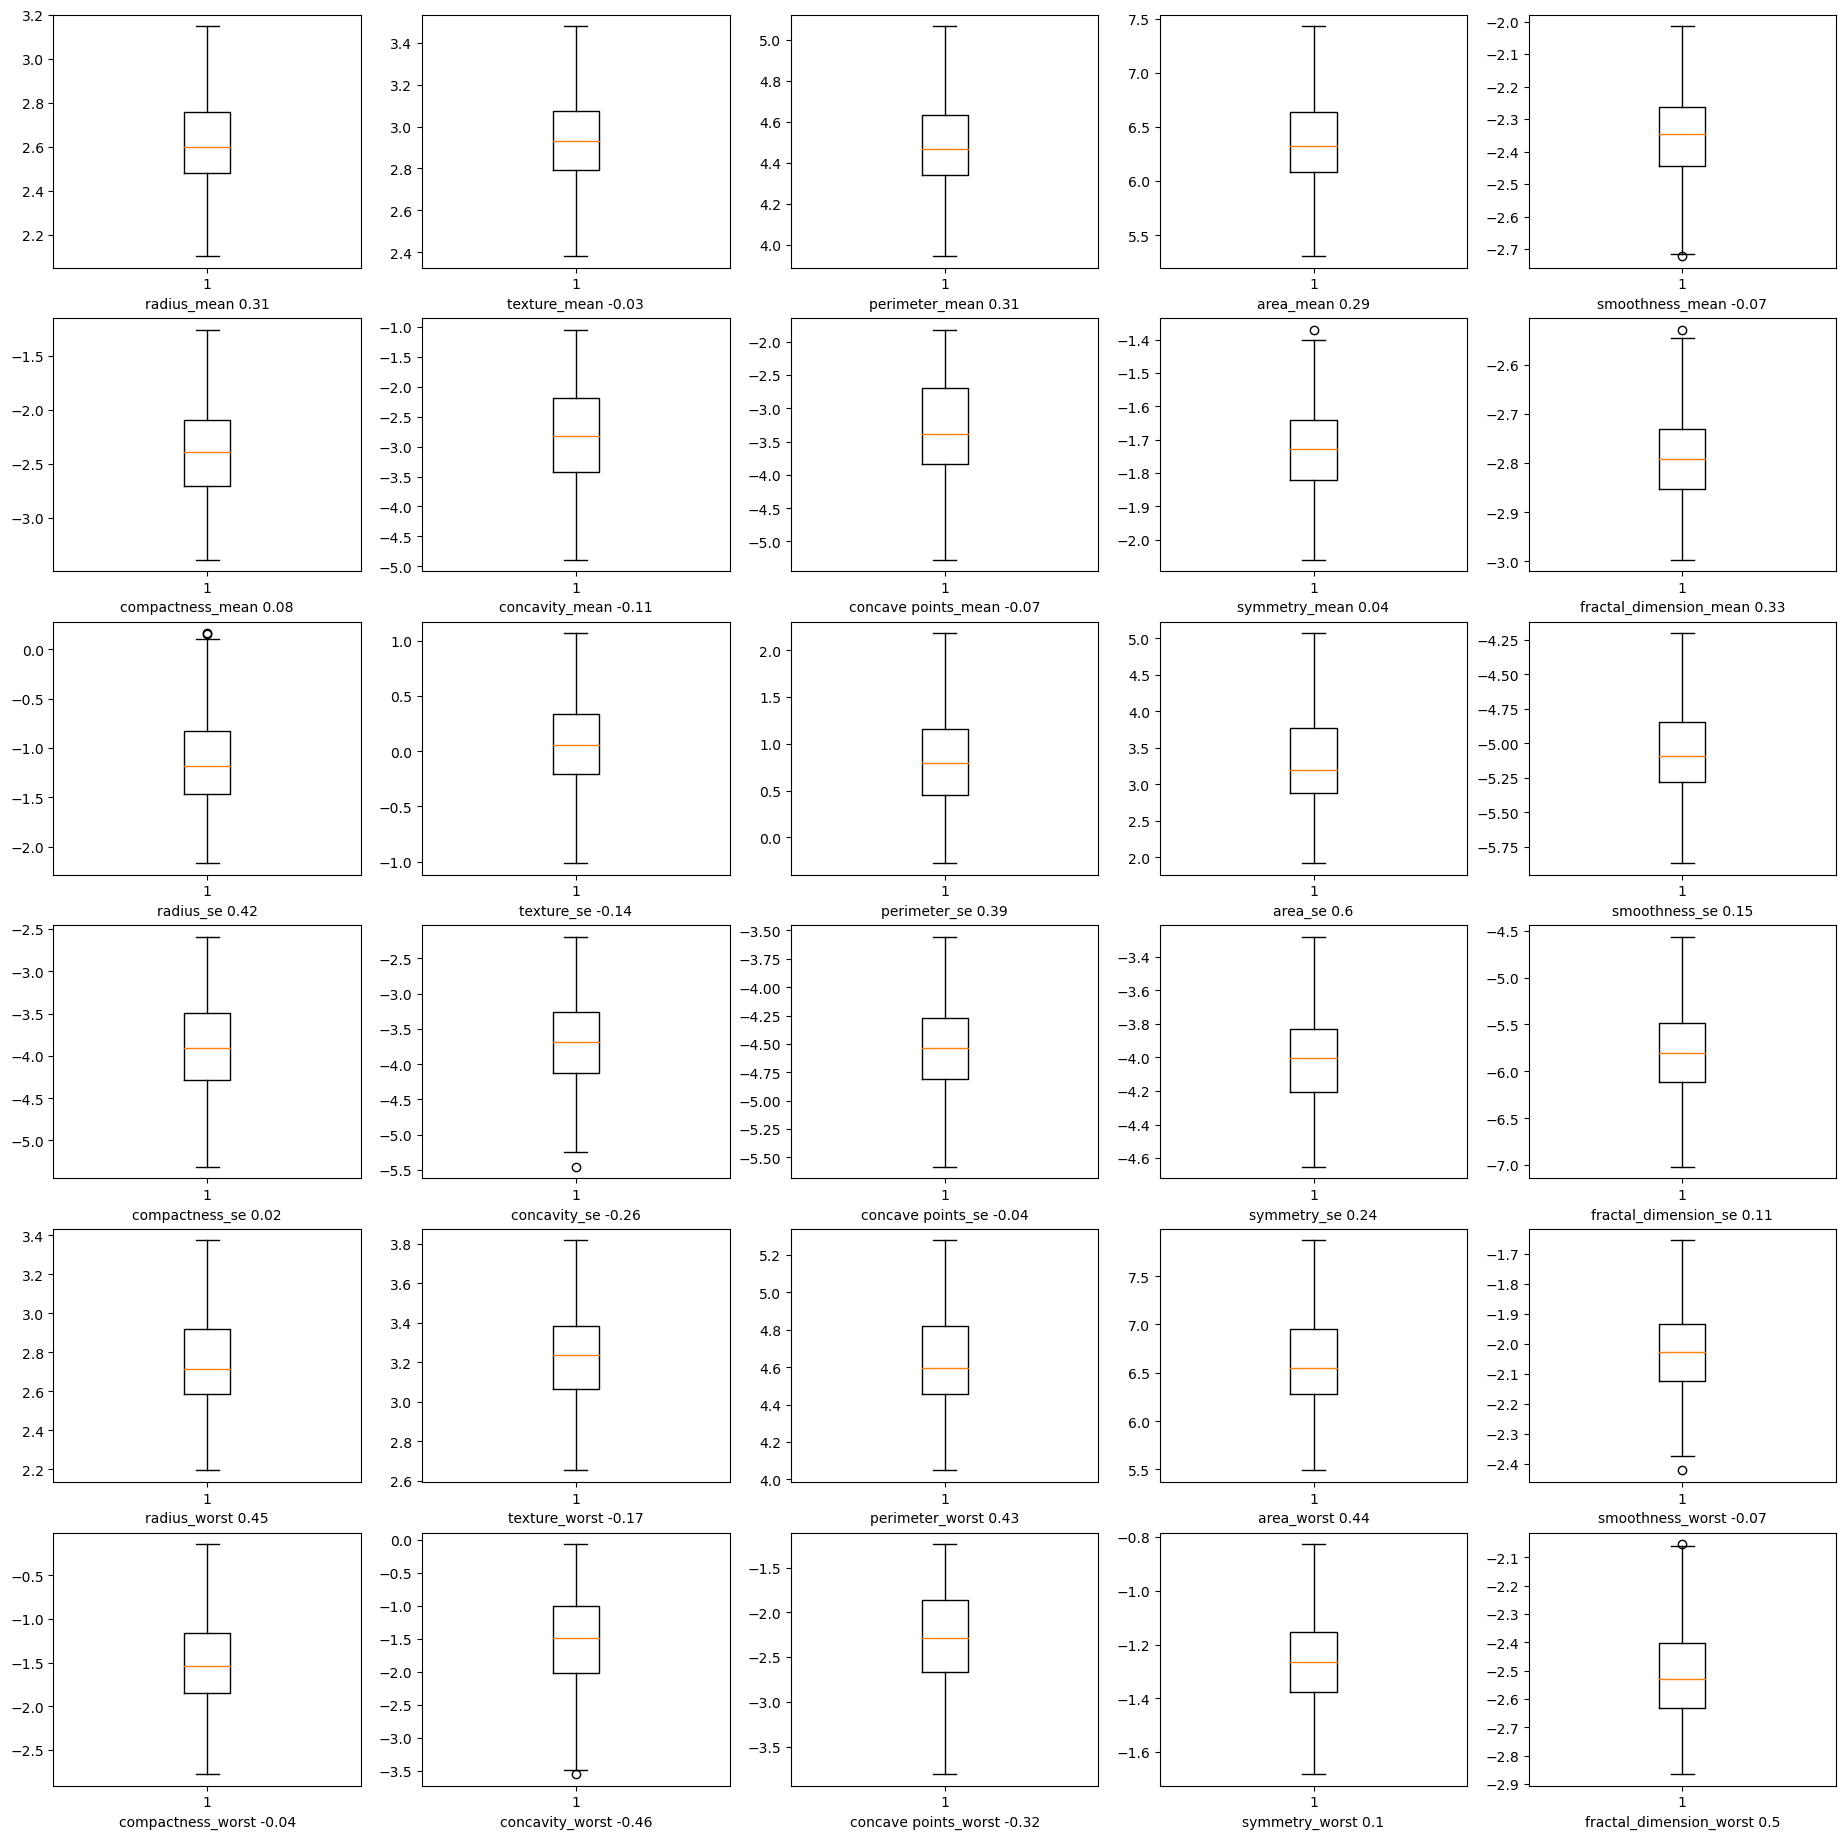

In [17]:
fig, axes = plt.subplots(6, 5, figsize=(23, 23))
num_cols = 1
for x in range(len(axes)):
    for y in range(len(axes[0])):
        axes[x, y].boxplot(df_clean[df_clean.columns[num_cols]])
        axes[x, y].set_xlabel(f'{df_clean.columns[num_cols]} {round(df_clean[df_clean.columns[num_cols]].skew(), 2)}') 
        num_cols += 1

## Handling Data types

In [18]:
df_clean['diagnosis'] = df_clean['diagnosis'].astype('category')

In [19]:
df_clean['diagnosis'] = df_clean['diagnosis'].cat.codes

## Show Correlations

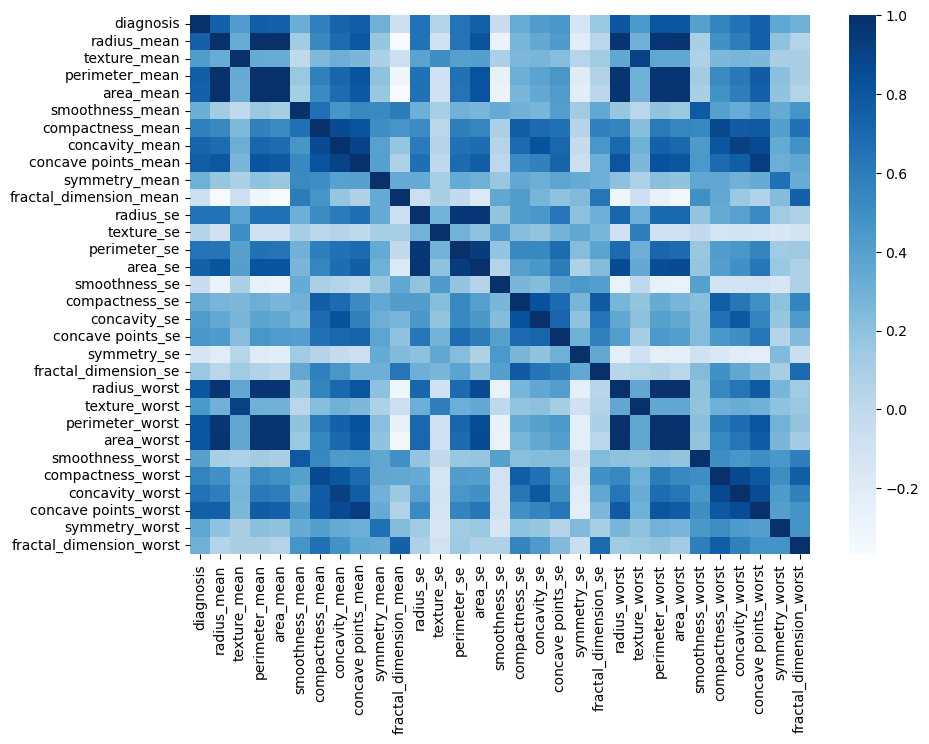

In [71]:
fig = plt.figure(figsize=(10,7))
sns.heatmap(df_clean.corr(),cmap='Blues');

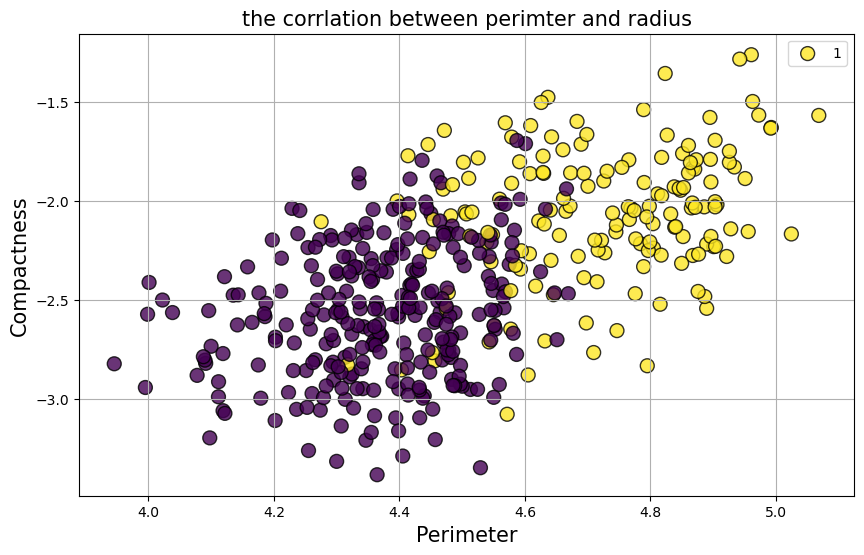

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(x = df_clean['perimeter_mean'],y=df_clean['compactness_mean'],c=df_clean['diagnosis'],edgecolors='k',alpha=0.8,s=100)
plt.grid(True)
plt.title("the corrlation between perimter and radius",fontsize=15)
plt.xlabel("Perimeter",fontsize=15)
plt.ylabel("Compactness",fontsize=15)
plt.legend(df_clean['diagnosis']);

# Building Model

## Prepare Data for Modeling

In [22]:
test_size = 0.2

In [23]:
X = df_clean.drop('diagnosis',axis=1)
y = df_clean['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [24]:
y_test.shape

(90,)

In [25]:
X_train.shape

(356, 30)

In [26]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
13,2.763170,3.175968,4.641502,6.662749,-2.476819,-2.300587,-2.308804,-2.925460,-1.689022,-2.930319,...,2.823757,3.319987,4.718499,6.775937,-2.179483,-1.648179,-1.460156,-2.190150,-1.269757,-2.766686
267,2.609334,3.083743,4.467746,6.329721,-2.531244,-2.493867,-3.201036,-3.843430,-1.810942,-2.837191,...,2.694627,3.402530,4.581492,6.494510,-2.297598,-1.754464,-1.928955,-2.782397,-1.408131,-2.655837
73,2.624669,2.759377,4.504576,6.370072,-2.295609,-2.055725,-2.552458,-2.982027,-1.794563,-2.723265,...,2.807594,3.037833,4.703204,6.699993,-1.958286,-1.037894,-1.280494,-1.978330,-1.351313,-2.273026
357,2.629728,2.785628,4.483229,6.386374,-2.436917,-2.901878,-4.198373,-3.868964,-1.949115,-2.833103,...,2.715357,3.241811,4.572027,6.543048,-2.160218,-2.294617,-2.940298,-2.890292,-1.443076,-2.643246
43,2.586259,3.009635,4.469580,6.301153,-2.262403,-1.940724,-2.318003,-2.787418,-1.622523,-2.690898,...,2.855320,3.332205,4.728272,6.810363,-1.877317,-0.987787,-1.004030,-1.902468,-0.983767,-2.275943


## Gaussian NB Model

In [48]:
nbc = GaussianNB()

In [ ]:
nbc.fit(X_train, y_train);

In [49]:
y_pred = nbc.predict(X_test)

8

In [50]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        58
           1       0.85      0.91      0.88        32

    accuracy                           0.91        90
   macro avg       0.90      0.91      0.90        90
weighted avg       0.91      0.91      0.91        90



In [51]:
cm = (confusion_matrix(y_test,y_pred))
cmdf = pd.DataFrame(cm,index=['Malignant','Benign'], columns=['Malignant','Benign'])

<AxesSubplot: >

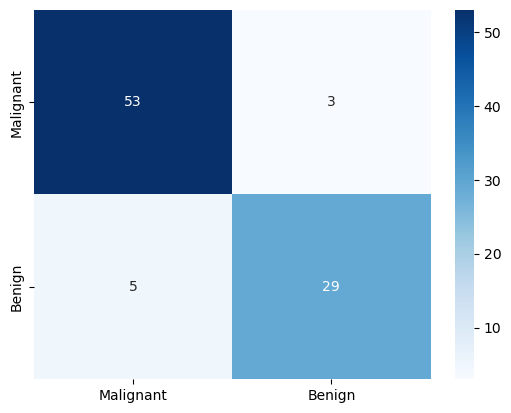

In [52]:
sns.heatmap(cmdf,annot=True,cmap='Blues')

## Logistic Regression Model

In [53]:
lr_model = LogisticRegression()

LogisticRegression()

In [ ]:
lr_model.fit(X_train, y_train)

In [54]:
y_pred = lr_model.predict(X_test).reshape(len(y_test,))

2

In [55]:
y_pred = y_pred.reshape(len(y_test),1)
y_pred.shape

(90, 1)

In [56]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        58
           1       0.94      1.00      0.97        32

    accuracy                           0.98        90
   macro avg       0.97      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90



In [57]:
cm = (confusion_matrix(y_test,y_pred))
cmdf = pd.DataFrame(cm,index=['Malignant','Benign'], columns=['Malignant','Benign'])

<AxesSubplot: >

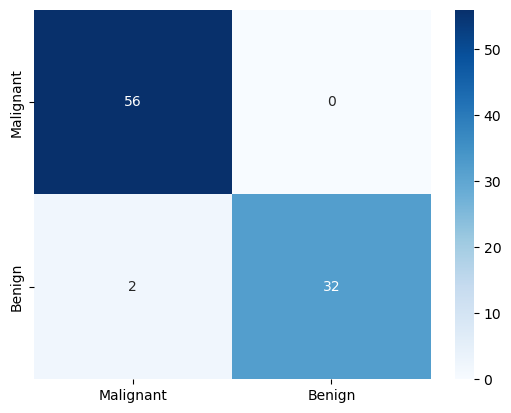

In [58]:
sns.heatmap(cmdf,annot=True,cmap='Blues')

## Decision Tree Model

In [59]:
Dc_model = DecisionTreeClassifier(random_state = 42)

DecisionTreeClassifier(random_state=42)

In [ ]:
Dc_model.fit(X_train, y_train)

In [60]:
y_pred = Dc_model.predict(X_test)

10

In [61]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        54
           1       0.88      0.83      0.86        36

    accuracy                           0.89        90
   macro avg       0.89      0.88      0.88        90
weighted avg       0.89      0.89      0.89        90



In [62]:
cm = (confusion_matrix(y_test,y_pred))
cmdf = pd.DataFrame(cm,index=['Malignant','Benign'], columns=['Malignant','Benign'])

<AxesSubplot: >

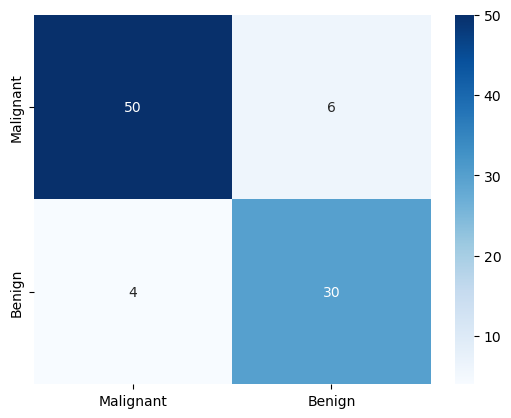

In [63]:
sns.heatmap(cmdf,annot=True,cmap='Blues')

## Random Forest Model

In [64]:
rf_model = RandomForestClassifier(random_state = 42)

RandomForestClassifier(random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)

In [65]:
y_pred = rf_model.predict(X_test)

7

In [66]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        57
           1       0.88      0.91      0.90        33

    accuracy                           0.92        90
   macro avg       0.91      0.92      0.92        90
weighted avg       0.92      0.92      0.92        90



In [67]:
cm = (confusion_matrix(y_test,y_pred))
cmdf = pd.DataFrame(cm,index=['Malignant','Benign'], columns=['Malignant','Benign'])

<AxesSubplot: >

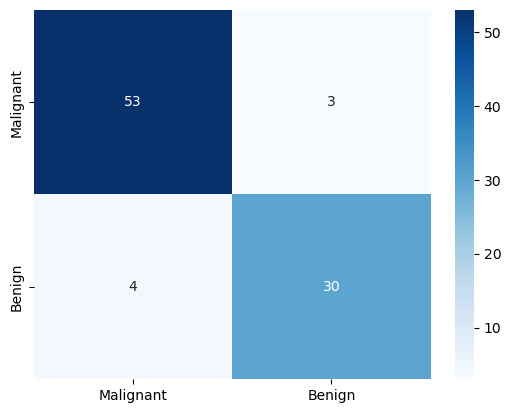

In [68]:
sns.heatmap(cmdf,annot=True,cmap='Blues')